In [110]:
import meep as mp
import matplotlib.pyplot as plt

In [111]:
size = mp.Vector3(4, 0, 2)
nm = 1e-3
resolution = 50

thickness1 = 0.25*700*nm
thickness2 = 0.5*700*nm

Air = mp.Medium(index=1)
SiO2 = mp.Medium(index = 1.46)
Si = mp.Medium(index = 3.68)

In [112]:
geometry_air = [
    mp.Block(
        size=mp.Vector3(4,mp.inf,mp.inf),
        center = mp.Vector3(0,0,0),
        material = Air
    )
]

pml_layer = [mp.PML(thickness=0.5, direction=mp.X)]

In [113]:
wmin = 400*nm
wmax = 700*nm
fmin = 1/wmax
fmax = 1/wmin

fcen = (fmax+fmin)/2

# 300개 point로 split
n_freq = 300

sources = [
    mp.Source(
        src = mp.GaussianSource(frequency = fcen, fwidth = fmax-fmin),
        center = mp.Vector3(-1.2,0,0),
        size = mp.Vector3(0,0,2),
        component = mp.Ez
)
]

     block, center = (0,0,0)
          size (4,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


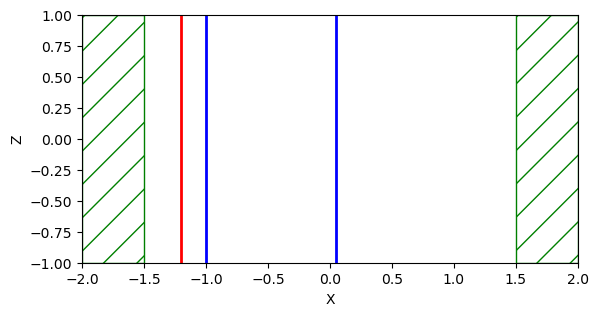

In [114]:
sim = mp.Simulation(
    cell_size=size,
    resolution=resolution,
    geometry=geometry_air,
    boundary_layers=pml_layer,
    sources=sources
)

# reflected flux
refl_fr1 = mp.FluxRegion(
    center=mp.Vector3(-1,0,0), size=mp.Vector3(0, 0, 4)
)
refl1 = sim.add_flux((fmax+fmin)/2, fmax-fmin, n_freq, refl_fr1)

# transmitted flux
tran_fr1 = mp.FluxRegion(
    center=mp.Vector3(0.05,0,0), size=mp.Vector3(0, 0, 4)
)
tran1 = sim.add_flux((fmax+fmin)/2, fmax-fmin, n_freq, tran_fr1)

# sim.run(until = 300)

sim.plot2D()

plt.show()

In [115]:
pt = mp.Vector3(1,0,0)

sim.run(until_after_sources = mp.stop_when_fields_decayed(dt = 50, c = mp.Ez, pt=pt, decay_by=1e-3))

refl_flux_air = sim.get_flux_data(refl1)
tran_flux_air = mp.get_fluxes(tran1)

-----------
Initializing structure...
time for choose_chunkdivision = 3.29018e-05 s
Working in 3D dimensions.
Computational cell is 4 x 0.02 x 2 with resolution 50
     block, center = (0,0,0)
          size (4,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0726399 s
-----------
on time step 224 (time=2.24), 0.09198 s/step
field decay(t = 50.01): 0.25386019000888266 / 0.25386019000888266 = 1.0
field decay(t = 100.01): 5.262234347238973e-11 / 0.25386019000888266 = 2.0728867913692358e-10
run 0 finished at t = 100.01 (10001 timesteps)


-----------
Initializing structure...
time for choose_chunkdivision = 3.00407e-05 s
Working in 3D dimensions.
Computational cell is 4 x 0.02 x 2 with resolution 50
     block, center = (-2.9125,0,0)
          size (1.825,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.0875,0,0)
          size (0.175,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1316,2.1316,2.1316)
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13.5424,13.5424,13.5424)
time for set_epsilon = 0.0562232 s
-----------
on time step 1275 (time=12.75), 0.0165173 s/step
field decay(t = 50.01): 0.056388561633471966 / 0.056388561633471966 = 1.0
field decay(t = 100.01): 2.603286040378603e-11 / 0.056388561633471966 = 4.6166916923685205e-10
run 0 finished at t = 100.01 (10001 timestep

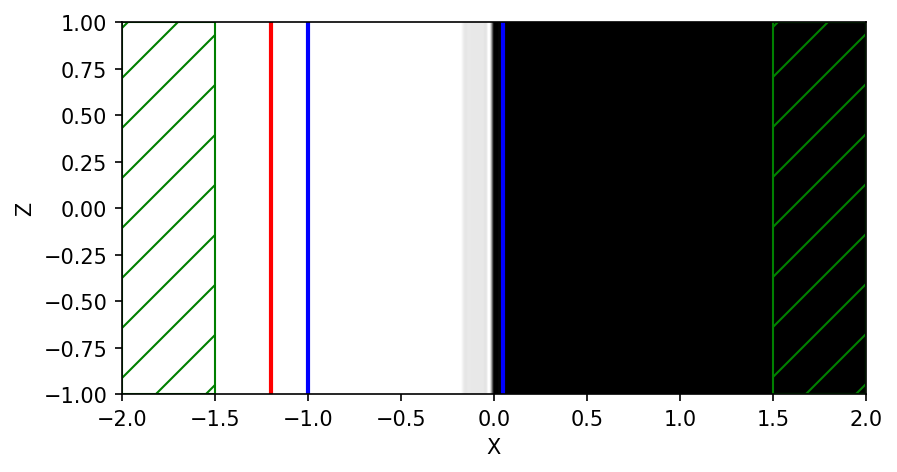

In [116]:
sim.reset_meep()

geometry_2a = [
    # Air block
    mp.Block(
             size = mp.Vector3(2-thickness1, mp.inf, mp.inf),
             center = mp.Vector3(-2 - 0.5*(2 - thickness1),0,0),
             material = Air
             ),
    # SiO2 block
    mp.Block(
             size = mp.Vector3(thickness1, mp.inf, mp.inf),
             center = mp.Vector3(-0.5*thickness1,0,0),
             material = SiO2
             ),
    # Si block
    mp.Block(
             size = mp.Vector3(2, mp.inf, mp.inf),
             center = mp.Vector3(1,0,0),
             material = Si
             )
]

sim = mp.Simulation(
    sources = sources,
    cell_size=size,
    resolution=resolution,
    geometry=geometry_2a,
    boundary_layers=pml_layer
)

refl1 = sim.add_flux(fcen, fmax-fmin, n_freq, refl_fr1)
tran1 = sim.add_flux(fcen, fmax-fmin, n_freq, tran_fr1)

sim.load_minus_flux_data(refl1, refl_flux_air)

sim.run(until_after_sources = mp.stop_when_fields_decayed(dt = 50, c = mp.Ez, pt=pt, decay_by=1e-3))

result_refl_flux = mp.get_fluxes(refl1)
result_tran_flux = mp.get_fluxes(tran1)

plt.figure(dpi =150)
sim.plot2D()
plt.show()

In [117]:
print(result_tran_flux)
print(tran_flux_air)

[2.413460051124117e-06, 2.7622532254189576e-06, 3.158593547599939e-06, 3.608553998550232e-06, 4.118902917550483e-06, 4.697175118782643e-06, 5.351833771771656e-06, 6.09227345101053e-06, 6.928913245757622e-06, 7.873394990261447e-06, 8.938608557773528e-06, 1.0138832671074596e-05, 1.1489974629109445e-05, 1.3009601662686544e-05, 1.4717113880060755e-05, 1.6634020757363005e-05, 1.8783989594282214e-05, 2.1193075947221983e-05, 2.3890054632515576e-05, 2.690649257127807e-05, 3.0277043394257194e-05, 3.4039818412246966e-05, 3.823645377782961e-05, 4.291247810847641e-05, 4.811777402049126e-05, 5.390666926131376e-05, 6.033836149064003e-05, 6.747745655719314e-05, 7.539410887831767e-05, 8.416452904071717e-05, 9.387158786819909e-05, 0.00010460499758497314, 0.0001164619187221041, 0.0001295476370761069, 0.00014397578250672726, 0.00015986903324515482, 0.00017735984554278597, 0.00019659067955170154, 0.00021771477368792905, 0.00024089688967457033, 0.00026631351154181147, 0.0002941536681787739, 0.0003246196645

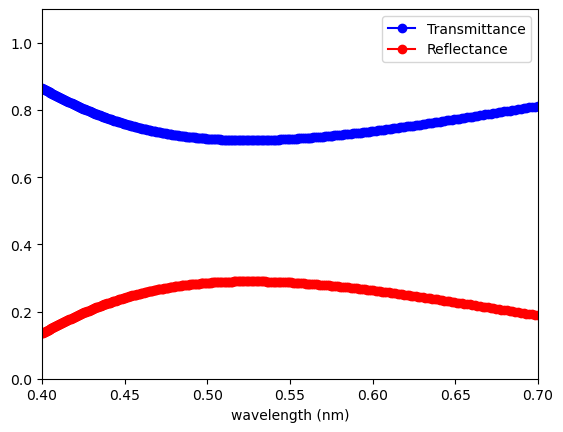

In [ ]:
import numpy as np

wl = []
Rs = []
Ts = []

flux_freqs = mp.get_flux_freqs(refl1) # 측정된 Power의 주파수를 저장합니다.


for i in range(n_freq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs, - result_refl_flux[i] / tran_flux_air[i])
    Ts = np.append(Ts, result_tran_flux[i] / tran_flux_air[i])

plt.figure()
plt.plot(wl, Ts, "bo-", label = "Transmittance")
plt.plot(wl, Rs, "ro-", label = "Reflectance")
plt.axis([0.4, 0.7, 0, 1.1])
plt.xlabel("wavelength (nm)")
plt.legend(loc="upper right")
plt.show()